In [ ]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
start = datetime.datetime.strptime("01-12-2021", "%d-%m-%Y")
date_generated = pd.date_range(start, periods=5).to_pydatetime().tolist()

In [ ]:
pip install openpyxl

In [ ]:
a=print(date_generated)

[datetime.datetime(2021, 12, 1, 0, 0), datetime.datetime(2021, 12, 2, 0, 0), datetime.datetime(2021, 12, 3, 0, 0), datetime.datetime(2021, 12, 4, 0, 0), datetime.datetime(2021, 12, 5, 0, 0)]


In [ ]:
import pandas as pd
from datetime import datetime , timedelta, timezone
datelist = pd.date_range(start="2019-12-17",end="2022-03-13").tolist()


In [ ]:
df=pd.DataFrame(datelist)
print(df)

             0
0   2019-12-17
1   2019-12-18
2   2019-12-19
3   2019-12-20
4   2019-12-21
..         ...
813 2022-03-09
814 2022-03-10
815 2022-03-11
816 2022-03-12
817 2022-03-13

[818 rows x 1 columns]


In [ ]:
df.to_excel("output.xlsx")

**EDA**

In [ ]:
data = pd.read_excel ('DATA_MIZAN_V1.xlsx')
list_ = pd.read_excel ('LIST DATE.xlsx')
list_.columns = ['Date']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24453 entries, 0 to 24452
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       24453 non-null  datetime64[ns]
 1   Date          24453 non-null  datetime64[ns]
 2   YEAR          24453 non-null  int64         
 3   MONTH         24453 non-null  object        
 4   Id_Transaksi  24453 non-null  int64         
 5   Id_Donatur    24453 non-null  int64         
 6   Nominal       24453 non-null  int64         
 7   Akad          24453 non-null  object        
 8   Program       24186 non-null  object        
 9   Payment       24417 non-null  object        
 10  Platform      23852 non-null  object        
 11  Type_Trans    24443 non-null  object        
 12  Pay Methode   24453 non-null  object        
 13  Range         24453 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(8)
memory usage: 2.6+ MB


In [ ]:
# print(dat)
data.head()

,Tanggal,Date,YEAR,MONTH,Id_Transaksi,Id_Donatur,Nominal,Akad,Program,Payment,Platform,Type_Trans,Pay Methode,Range
0,2022-03-12 07:48:12,2022-03-12,2022,Jan,47409,31812,100000,Wakaf,Gerakan Wakaf 10.000 Al Quran untuk Indonesia,gopay,CFD v2,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000
1,2022-03-12 07:37:43,2022-03-12,2022,Mar,47408,31812,100000,Infaq Sedekah,"Yuk Sedekah Jumat, Berbagi Makan dengan Para Tamu",gopay,CFD v2,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000
2,2022-03-12 06:29:53,2022-03-12,2022,Mar,47400,25104,20000,Infaq Sedekah,sedekah subuh,BRI,Android,ONLINE_DONATION,Bri,1.Rp.0 - Rp 500.000
3,2022-03-12 05:03:13,2022-03-12,2022,Mar,47399,28057,50000,Panti Asuhan,Panti Asuhan Kahfi 2 Jakarta Selatan,gopay,CFD v2,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000
4,2022-03-11 20:09:57,2022-03-11,2022,Mar,4413,18008,50000,Zakat Penghasilan,Zakat Penghasilan,bank_transfer,CFD v2,ONLINE_ZAKAT,Transfer,1.Rp.0 - Rp 500.000


In [ ]:
data.rename(columns=({'Pay Methode':'Pay_Methode' }),inplace=True)

In [ ]:
data.drop('Id_Transaksi', axis = 1, inplace = True) >>> UNTUK DELETE

In [ ]:
data.isnull().sum()

Tanggal           0
Date              0
YEAR              0
MONTH             0
Id_Transaksi      0
Id_Donatur        0
Nominal           0
Akad              0
Program         267
Payment          36
Platform        601
Type_Trans       10
Pay Methode       0
Range             0
dtype: int64

In [ ]:
data.Id_Donatur.value_counts(normalize=True)

27510    0.045925
26765    0.013863
36006    0.009283
23355    0.008670
15314    0.008588
           ...   
15053    0.000041
15054    0.000041
15058    0.000041
15061    0.000041
27228    0.000041
Name: Id_Donatur, Length: 10170, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import date
from pandas.tseries.offsets import MonthEnd
import plotly.express as px
import plotly.graph_objs as go

# sns.catplot(x="Date", kind="count", palette="pastel", data=data, hue="Id_Donatur", aspect=1.2).set(title='Customer Contract Renewal Status')


In [ ]:
columns = ['Date','Id_Transaksi']
data[columns].groupby(data['Id_Transaksi']).nunique()

,Date,Id_Transaksi
Id_Transaksi,,
9,1,1
15,1,1
16,1,1
17,1,1
22,1,1
...,...,...
47397,1,1
47399,1,1
47400,1,1


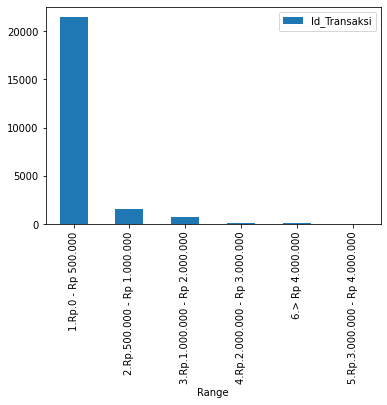

In [ ]:
data2=pd.DataFrame(data, columns=['Id_Transaksi','Range'])
data2.groupby(['Range']).nunique().sort_values("Id_Transaksi",ascending=False).plot.bar()

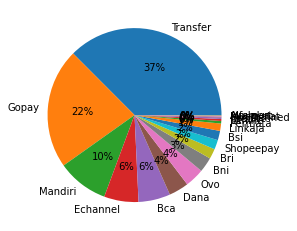

In [ ]:
plt.pie(data.Pay_Methode.value_counts(),
        labels=data.Pay_Methode.value_counts().index,
        autopct='%.0f%%')
plt.show()

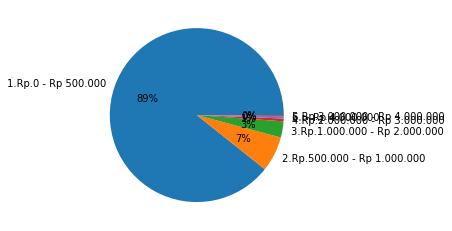

In [ ]:
plt.pie(data.Range.value_counts(),
        labels=data.Range.value_counts().index,
        autopct='%.0f%%')
plt.show()

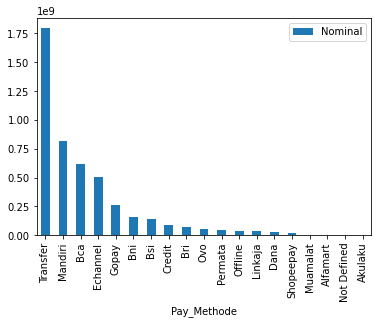

In [ ]:
data1=pd.DataFrame(data, columns=['Pay_Methode','Nominal'])
data1.groupby(['Pay_Methode']).sum().sort_values("Nominal",ascending=False).plot.bar()


In [ ]:
by_date = pd.Series(data['Date']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_date = by_date.rename_axis('Date').reset_index(name='counts')
fig = go.Figure(data=go.Scatter(x=df_date['Date'].astype(dtype=str),
                                y=df_date['counts'],
                                marker_color='black', text="counts"))
fig.update_layout({"title": 'PERFORMANCE PER DAY',
                   "xaxis": {"title":"DATE"},
                   "yaxis": {"title":"VALUES"},
                   "showlegend": False})

In [ ]:
print(by_date)

2019-12-17     4
2019-12-23     3
2019-12-26     1
2019-12-27     1
2019-12-29     1
              ..
2022-03-08    14
2022-03-09     7
2022-03-10    10
2022-03-11    35
2022-03-12     4
Name: Date, Length: 770, dtype: int64


In [ ]:
df_date.head()

,Date,counts
0,2019-12-17,4
1,2019-12-23,3
2,2019-12-26,1
3,2019-12-27,1
4,2019-12-29,1


In [ ]:
a=data['monthyear'] = pd.to_datetime(data['Date']).dt.to_period('M')
print(a)

0        2022-03
1        2022-03
2        2022-03
3        2022-03
4        2022-03
          ...   
24448    2019-12
24449    2019-12
24450    2019-12
24451    2019-12
24452    2019-12
Name: Date, Length: 24453, dtype: period[M]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

JOIN DATA MIZAN WITH DATE

In [ ]:
dat=pd.merge(data,list_,on='Date',how='right')
dat_ = pd.DataFrame(dat, columns= ['Date','YEAR','MONTH','Id_Transaksi','Id_Donatur','Nominal','Akad','Program','Payment','Platform','Type_Trans','Pay Methode','Range'])
dat_.to_excel("output1.xlsx")
dat_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24501 entries, 0 to 24500
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          24501 non-null  datetime64[ns]
 1   YEAR          24453 non-null  float64       
 2   MONTH         24453 non-null  object        
 3   Id_Transaksi  24453 non-null  float64       
 4   Id_Donatur    24453 non-null  float64       
 5   Nominal       24453 non-null  float64       
 6   Akad          24453 non-null  object        
 7   Program       24186 non-null  object        
 8   Payment       24417 non-null  object        
 9   Platform      23852 non-null  object        
 10  Type_Trans    24443 non-null  object        
 11  Pay Methode   24453 non-null  object        
 12  Range         24453 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 2.6+ MB


In [ ]:
dat_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24501 entries, 0 to 24500
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          24501 non-null  datetime64[ns]
 1   YEAR          24453 non-null  float64       
 2   MONTH         24453 non-null  object        
 3   Id_Transaksi  24453 non-null  float64       
 4   Id_Donatur    24453 non-null  float64       
 5   Nominal       24453 non-null  float64       
 6   Akad          24453 non-null  object        
 7   Program       24186 non-null  object        
 8   Payment       24417 non-null  object        
 9   Platform      23852 non-null  object        
 10  Type_Trans    24443 non-null  object        
 11  Pay Methode   24453 non-null  object        
 12  Range         24453 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 2.6+ MB


**METHODE RFM**

In [ ]:
df_recency = dat_.groupby(by='Id_Donatur',
                        as_index=False)['Date'].max()
df_recency.columns = ['Id_Donatur', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,Id_Donatur,LastPurchaseDate,Recency
0,14409.0,2021-02-27,378
1,14411.0,2021-01-05,431
2,14412.0,2021-01-05,431
3,14415.0,2021-02-06,399
4,14423.0,2021-01-05,431


In [ ]:
dat_

,Date,YEAR,MONTH,Id_Transaksi,Id_Donatur,Nominal,Akad,Program,Payment,Platform,Type_Trans,Pay Methode,Range
0,2019-12-17,2019.0,Dec,129.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000
1,2019-12-17,2019.0,Dec,130.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000
2,2019-12-17,2019.0,Dec,137.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000
3,2019-12-17,2019.0,Dec,45.0,23403.0,650000.0,Zakat Penghasilan,Zakat Penghasilan,Bank Transfer,NaN,ONLINE_ZAKAT,Transfer,2.Rp.500.000 - Rp 1.000.000
4,2019-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24496,2022-03-12,2022.0,Jan,47409.0,31812.0,100000.0,Wakaf,Gerakan Wakaf 10.000 Al Quran untuk Indonesia,gopay,CFD v2,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000
24497,2022-03-12,2022.0,Mar,47408.0,31812.0,100000.0,Infaq Sedekah,"Yuk Sedekah Jumat, Berbagi Makan dengan Para Tamu",gopay,CFD v2,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000
24498,2022-03-12,2022.0,Mar,47400.0,25104.0,20000.0,Infaq Sedekah,sedekah subuh,BRI,Android,ONLINE_DONATION,Bri,1.Rp.0 - Rp 500.000
24499,2022-03-12,2022.0,Mar,47399.0,28057.0,50000.0,Panti Asuhan,Panti Asuhan Kahfi 2 Jakarta Selatan,gopay,CFD v2,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000


In [ ]:
frequency_df = dat_.drop_duplicates().groupby(
    by=['Id_Donatur'], as_index=False)['Date'].count()
frequency_df.columns = ['Id_Donatur', 'Frequency']
frequency_df.head()

,Id_Donatur,Frequency
0,14409.0,3
1,14411.0,1
2,14412.0,1
3,14415.0,2
4,14423.0,1


In [ ]:
dat_['Total'] = dat_['Nominal']
monetary_df = dat_.groupby(by='Id_Donatur', as_index=False)['Total'].sum()
monetary_df.columns = ['Id_Donatur', 'Monetary']
monetary_df.head()

,Id_Donatur,Monetary
0,14409.0,230000.0
1,14411.0,20000.0
2,14412.0,150000.0
3,14415.0,231069.0
4,14423.0,25000.0


In [ ]:
rf_df = df_recency.merge(frequency_df, on='Id_Donatur')
rfm_df = rf_df.merge(monetary_df, on='Id_Donatur').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,Id_Donatur,Recency,Frequency,Monetary
0,14409.0,378,3,230000.0
1,14411.0,431,1,20000.0
2,14412.0,431,1,150000.0
3,14415.0,399,2,231069.0
4,14423.0,431,1,25000.0


In [ ]:

rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()

,Id_Donatur,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,14409.0,378,3,230000.0,55.900285,86.617502,86.617502
1,14411.0,431,1,20000.0,49.808241,35.172075,35.172075
2,14412.0,431,1,150000.0,49.808241,35.172075,35.172075
3,14415.0,399,2,231069.0,53.800767,77.197640,77.197640
4,14423.0,431,1,25000.0,49.808241,35.172075,35.172075


In [ ]:
# Rating Customer based upon the RFM score
-rfm score >4.5 : Top Customer
-4.5 > rfm score > 4 : High Value Customer
-4>rfm score >3 : Medium value customer
-3>rfm score>1.6 : Low-value customer
-rfm score<1.6 :Lost Customer
>>https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/#:~:text=RFM%20stands%20for%20recency%2C%20frequency,customers%2C%20and%20similarly%20many%20others.&text=Monetary%3A%20How%20much%20does%20the,on%20purchasing%20products%20from%20us.

In [ ]:

rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['Id_Donatur', 'RFM_Score']].head(7)

,Id_Donatur,RFM_Score
0,14409.0,4.10
1,14411.0,1.87
2,14412.0,1.87
3,14415.0,3.68
4,14423.0,1.87
5,14425.0,1.87
6,14426.0,4.39


In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Champion By Donator",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "Potensial High Donator",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "General Donator",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Churn Best Donator', 'About To Sleep Donator'))))))
data_used=rfm_df[['Id_Donatur', 'RFM_Score', 'Customer_segment']]

In [ ]:
data_used.head(20)

,Id_Donatur,RFM_Score,Customer_segment
0,14409.0,4.10,Potensial High Donator
1,14411.0,1.87,Churn Best Donator
2,14412.0,1.87,Churn Best Donator
3,14415.0,3.68,General Donator
4,14423.0,1.87,Churn Best Donator
5,14425.0,1.87,Churn Best Donator
6,14426.0,4.39,Potensial High Donator
7,14427.0,4.64,Champion By Donator
8,14428.0,1.87,Churn Best Donator
9,14433.0,1.87,Churn Best Donator


In [ ]:
data_used.to_excel("output.xlsx")

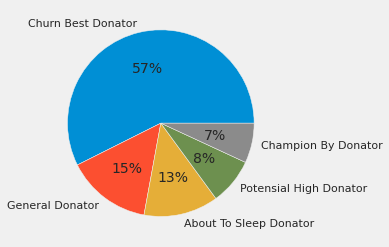

In [ ]:
import matplotlib.pyplot as plt
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

**FORECASTING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [ ]:
dat_.head(5)

,Date,YEAR,MONTH,Id_Transaksi,Id_Donatur,Nominal,Akad,Program,Payment,Platform,Type_Trans,Pay Methode,Range
0,2019-12-17,2019.0,Dec,129.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000
1,2019-12-17,2019.0,Dec,130.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000
2,2019-12-17,2019.0,Dec,137.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION,Gopay,1.Rp.0 - Rp 500.000
3,2019-12-17,2019.0,Dec,45.0,23403.0,650000.0,Zakat Penghasilan,Zakat Penghasilan,Bank Transfer,NaN,ONLINE_ZAKAT,Transfer,2.Rp.500.000 - Rp 1.000.000
4,2019-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dat1=pd.DataFrame(dat_[['Date', 'Nominal']])
# dat1.rename(columns=({'Date':'Tanggal' }),inplace=True)


In [ ]:
dat1.head()

,Date,Nominal
0,2019-12-17,100.0
1,2019-12-17,100.0
2,2019-12-17,100.0
3,2019-12-17,650000.0
4,2019-12-18,NaN


In [ ]:
sums = dat1.groupby(['Date'])['Nominal'].sum().reset_index(level=0)
sums

,Date,Nominal
0,2019-12-17,650300.0
1,2019-12-18,0.0
2,2019-12-19,0.0
3,2019-12-20,0.0
4,2019-12-21,0.0
...,...,...
813,2022-03-09,520000.0
814,2022-03-10,1331062.0
815,2022-03-11,7382305.0
816,2022-03-12,270000.0


In [ ]:
del dat['Date']

In [ ]:
# fit prophet model on the car sales dataset
from pandas import to_datetime
from fbprophet import Prophet
from matplotlib import pyplot

In [ ]:
# prepare expected column names
sums.columns = ['ds', 'y']
sums['ds']= to_datetime(sums['ds'])
sums.tail()

,ds,y
813,2022-03-09,520000.0
814,2022-03-10,1331062.0
815,2022-03-11,7382305.0
816,2022-03-12,270000.0
817,2022-03-13,0.0


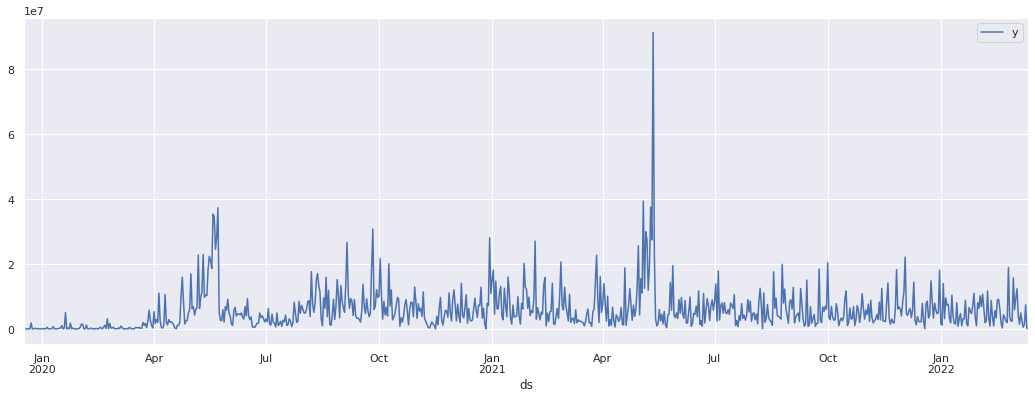

In [ ]:
sums.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(sums)

818

In [ ]:
#cara ke 2
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(sums)

In [ ]:
future=m.make_future_dataframe(periods=390,freq='D')
forecast2=m.predict(future)
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-17,540863.451659,-1.082156e+07,1.019196e+07,540863.451659,540863.451659,-1.197252e+06,-1.197252e+06,-1.197252e+06,-435877.500644,...,-5.322936e+05,-5.322936e+05,-5.322936e+05,-229080.759240,-229080.759240,-229080.759240,0.0,0.0,0.0,-6.563884e+05
1,2019-12-18,568859.160565,-9.628250e+06,1.035995e+07,568859.160565,568859.160565,-4.022095e+05,-4.022095e+05,-4.022095e+05,-435877.500644,...,2.360655e+05,2.360655e+05,2.360655e+05,-202397.511907,-202397.511907,-202397.511907,0.0,0.0,0.0,1.666496e+05
2,2019-12-19,596854.869470,-1.061033e+07,9.438414e+06,596854.869470,596854.869470,-1.060284e+06,-1.060284e+06,-1.060284e+06,-435877.500644,...,-4.452587e+05,-4.452587e+05,-4.452587e+05,-179147.438766,-179147.438766,-179147.438766,0.0,0.0,0.0,-4.634287e+05
3,2019-12-20,624850.578376,-6.250961e+06,1.513665e+07,624850.578376,624850.578376,3.573180e+06,3.573180e+06,3.573180e+06,-435877.500644,...,4.167746e+06,4.167746e+06,4.167746e+06,-158688.810781,-158688.810781,-158688.810781,0.0,0.0,0.0,4.198030e+06
4,2019-12-21,652846.287281,-1.155826e+07,9.249018e+06,652846.287281,652846.287281,-1.273964e+06,-1.273964e+06,-1.273964e+06,-435877.500644,...,-6.977759e+05,-6.977759e+05,-6.977759e+05,-140310.461307,-140310.461307,-140310.461307,0.0,0.0,0.0,-6.211175e+05


In [ ]:
forecast2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1203,2023-04-03,4.884006e+06,-6.962705e+06,1.500338e+07,2.050904e+06,7.803282e+06,-1.100550e+06,-1.100550e+06,-1.100550e+06,-435877.500644,...,-4.288423e+05,-4.288423e+05,-4.288423e+05,-2.358307e+05,-2.358307e+05,-2.358307e+05,0.0,0.0,0.0,3.783455e+06
1204,2023-04-04,4.880510e+06,-7.273182e+06,1.446166e+07,2.036126e+06,7.804797e+06,-1.372988e+06,-1.372988e+06,-1.372988e+06,-435877.500644,...,-5.322936e+05,-5.322936e+05,-5.322936e+05,-4.048174e+05,-4.048174e+05,-4.048174e+05,0.0,0.0,0.0,3.507522e+06
1205,2023-04-05,4.877015e+06,-7.783204e+06,1.487398e+07,2.022163e+06,7.806200e+06,-8.029145e+05,-8.029145e+05,-8.029145e+05,-435877.500644,...,2.360655e+05,2.360655e+05,2.360655e+05,-6.031025e+05,-6.031025e+05,-6.031025e+05,0.0,0.0,0.0,4.074100e+06
1206,2023-04-06,4.873519e+06,-6.908501e+06,1.329089e+07,2.010207e+06,7.807595e+06,-1.705534e+06,-1.705534e+06,-1.705534e+06,-435877.500644,...,-4.452587e+05,-4.452587e+05,-4.452587e+05,-8.243979e+05,-8.243979e+05,-8.243979e+05,0.0,0.0,0.0,3.167985e+06
1207,2023-04-07,4.870024e+06,-3.279753e+06,1.853328e+07,1.998252e+06,7.808855e+06,2.670465e+06,2.670465e+06,2.670465e+06,-435877.500644,...,4.167746e+06,4.167746e+06,4.167746e+06,-1.061404e+06,-1.061404e+06,-1.061404e+06,0.0,0.0,0.0,7.540489e+06


In [ ]:
forecast2[['ds','yhat']]

,ds,yhat
0,2019-12-17,-6.563884e+05
1,2019-12-18,1.666496e+05
2,2019-12-19,-4.634287e+05
3,2019-12-20,4.198030e+06
4,2019-12-21,-6.211175e+05
...,...,...
1203,2023-04-03,3.783455e+06
1204,2023-04-04,3.507522e+06
1205,2023-04-05,4.074100e+06
1206,2023-04-06,3.167985e+06


USING BUILT FB PROPHET VISUALITASION

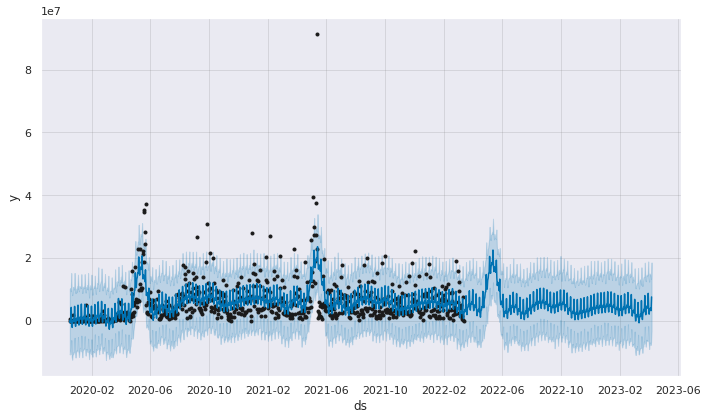

In [ ]:
plot1=m.plot(forecast2)

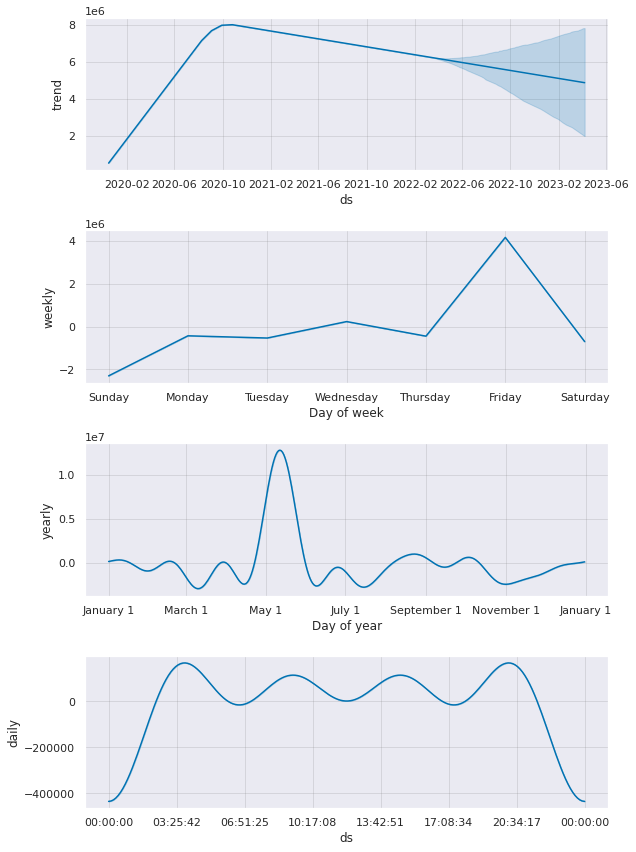

In [ ]:
plot1=m.plot_components(forecast2)

In [ ]:
metric_df = forecast2.set_index('ds')[['yhat']].join(sums.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [ ]:
metric_df

,ds,yhat,y
0,2019-12-17,-6.563884e+05,650300.0
1,2019-12-18,1.666496e+05,0.0
2,2019-12-19,-4.634287e+05,0.0
3,2019-12-20,4.198030e+06,0.0
4,2019-12-21,-6.211175e+05,0.0
...,...,...,...
813,2022-03-09,3.139802e+06,520000.0
814,2022-03-10,2.410731e+06,1331062.0
815,2022-03-11,7.012995e+06,7382305.0
816,2022-03-12,2.174355e+06,270000.0


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

0.3636104301989972

In [ ]:
import statistics


In [ ]:
statistics.mean(sums['Nominal'])

5728206.597799511

In [ ]:
mse = np.mean(se)
print(mse)


27075544569215.44


In [ ]:
mse=mean_squared_error(metric_df.y, metric_df.yhat)
print(mse)


27075544569215.46


In [ ]:
rmse= np.sqrt(mse)
print(rmse)

5203416.624604978


In [ ]:
y = pd.DataFrame(forecast2)
forecast2.to_excel("output2.xlsx")

FORECAST TRX

In [ ]:
dat2=pd.DataFrame(dat_[['Date', 'Id_Transaksi']])
dat2

,Date,Id_Transaksi
0,2019-12-17,129.0
1,2019-12-17,130.0
2,2019-12-17,137.0
3,2019-12-17,45.0
4,2019-12-18,NaN
...,...,...
24496,2022-03-12,47409.0
24497,2022-03-12,47408.0
24498,2022-03-12,47400.0
24499,2022-03-12,47399.0


In [ ]:
sums_ = dat2.groupby(['Date'])['Id_Transaksi'].nunique().reset_index(level=0)
sums_

,Date,Id_Transaksi
0,2019-12-17,4
1,2019-12-18,0
2,2019-12-19,0
3,2019-12-20,0
4,2019-12-21,0
...,...,...
813,2022-03-09,7
814,2022-03-10,10
815,2022-03-11,35
816,2022-03-12,4


In [ ]:
sums_.columns = ['ds', 'y']
sums_['ds']= to_datetime(sums_['ds'])
sums_.tail()

,ds,y
813,2022-03-09,7
814,2022-03-10,10
815,2022-03-11,35
816,2022-03-12,4
817,2022-03-13,0


In [ ]:
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(sums_)

In [ ]:
future=m.make_future_dataframe(periods=395,freq='D')
forecast3=m.predict(future)
forecast3.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-17,2.770810,-44.817941,37.894355,2.770810,2.770810,-6.844275,-6.844275,-6.844275,-4.899449,...,-2.747200,-2.747200,-2.747200,0.802374,0.802374,0.802374,0.0,0.0,0.0,-4.073465
1,2019-12-18,2.964881,-41.178256,39.575751,2.964881,2.964881,-5.049898,-5.049898,-5.049898,-4.899449,...,-0.670644,-0.670644,-0.670644,0.520195,0.520195,0.520195,0.0,0.0,0.0,-2.085017
2,2019-12-19,3.158952,-42.895926,37.351556,3.158952,3.158952,-7.430944,-7.430944,-7.430944,-4.899449,...,-2.714476,-2.714476,-2.714476,0.182981,0.182981,0.182981,0.0,0.0,0.0,-4.271992
3,2019-12-20,3.353023,-15.494057,64.204677,3.353023,3.353023,19.678243,19.678243,19.678243,-4.899449,...,24.772287,24.772287,24.772287,-0.194595,-0.194595,-0.194595,0.0,0.0,0.0,23.031266
4,2019-12-21,3.547094,-49.099823,33.525009,3.547094,3.547094,-11.864392,-11.864392,-11.864392,-4.899449,...,-6.368139,-6.368139,-6.368139,-0.596804,-0.596804,-0.596804,0.0,0.0,0.0,-8.317298


In [ ]:
forecast3.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1208,2023-04-08,63.926468,-10.240655,97.407795,31.077654,99.760402,-20.128097,-20.128097,-20.128097,-4.899449,...,-6.368139,-6.368139,-6.368139,-8.860509,-8.860509,-8.860509,0.0,0.0,0.0,43.798371
1209,2023-04-09,63.985992,-14.890547,92.684507,30.953500,100.051930,-24.464030,-24.464030,-24.464030,-4.899449,...,-9.568599,-9.568599,-9.568599,-9.995981,-9.995981,-9.995981,0.0,0.0,0.0,39.521962
1210,2023-04-10,64.045516,-6.715991,100.417412,30.829346,100.343458,-18.688525,-18.688525,-18.688525,-4.899449,...,-2.703230,-2.703230,-2.703230,-11.085846,-11.085846,-11.085846,0.0,0.0,0.0,45.356991
1211,2023-04-11,64.105039,-10.006116,96.676178,30.705192,100.634970,-19.737598,-19.737598,-19.737598,-4.899449,...,-2.747200,-2.747200,-2.747200,-12.090949,-12.090949,-12.090949,0.0,0.0,0.0,44.367441
1212,2023-04-12,64.164563,-3.474069,98.596094,30.581038,100.800312,-18.542647,-18.542647,-18.542647,-4.899449,...,-0.670644,-0.670644,-0.670644,-12.972555,-12.972555,-12.972555,0.0,0.0,0.0,45.621916


In [ ]:
forecast3[['ds','yhat']]

,ds,yhat
0,2019-12-17,-4.073465
1,2019-12-18,-2.085017
2,2019-12-19,-4.271992
3,2019-12-20,23.031266
4,2019-12-21,-8.317298
...,...,...
1208,2023-04-08,43.798371
1209,2023-04-09,39.521962
1210,2023-04-10,45.356991
1211,2023-04-11,44.367441


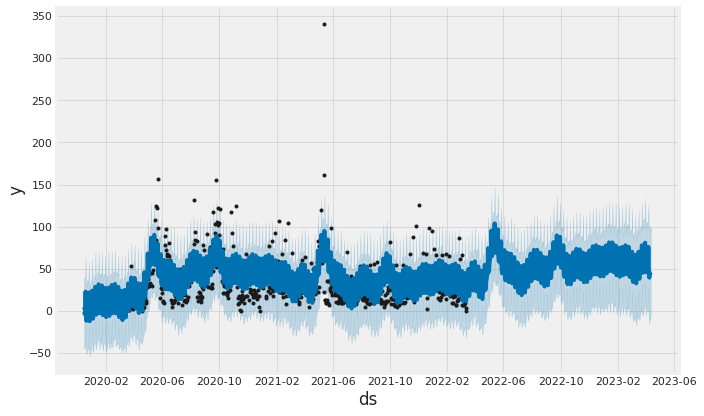

In [ ]:
plot_=m.plot(forecast3)

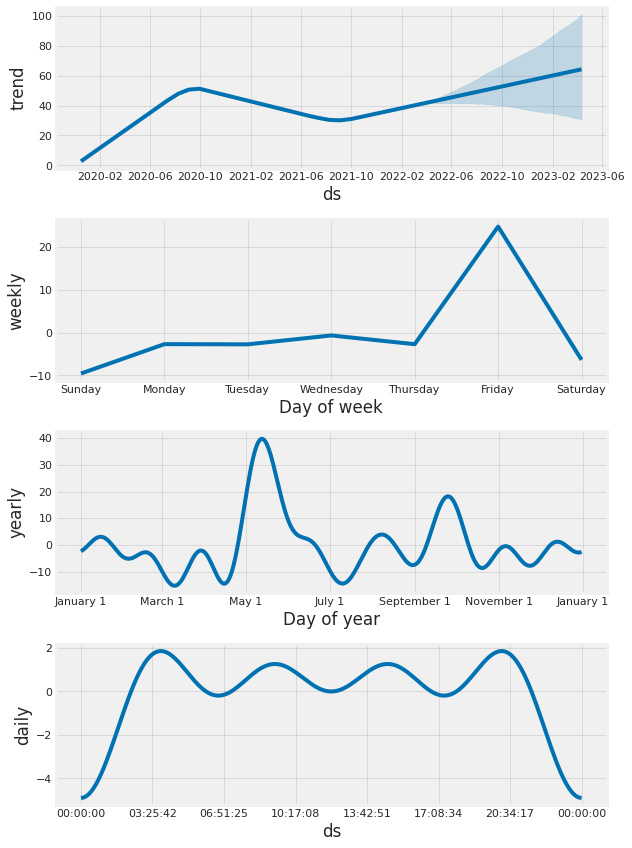

In [ ]:
plot_=m.plot_components(forecast3)

In [ ]:
metric_df_= forecast3.set_index('ds')[['yhat']].join(sums_.set_index('ds').y).reset_index()
metric_df_.dropna(inplace=True)

In [ ]:
r2_score(metric_df_.y, metric_df_.yhat)

0.46736845136316685

In [ ]:
y = pd.DataFrame(forecast3)
forecast3.to_excel("output2.xlsx")

CORET2AN

In [ ]:
##indexing
sums.index = pd.to_datetime(sums['Date'])
sums.drop(columns='Date',inplace=True)
sums.head()

sums.index = pd.to_datetime(sums['Date'], format='%Y-%m-%d')

,Nominal
Date,
2019-12-17,650300.0
2019-12-18,0.0
2019-12-19,0.0
2019-12-20,0.0
2019-12-21,0.0


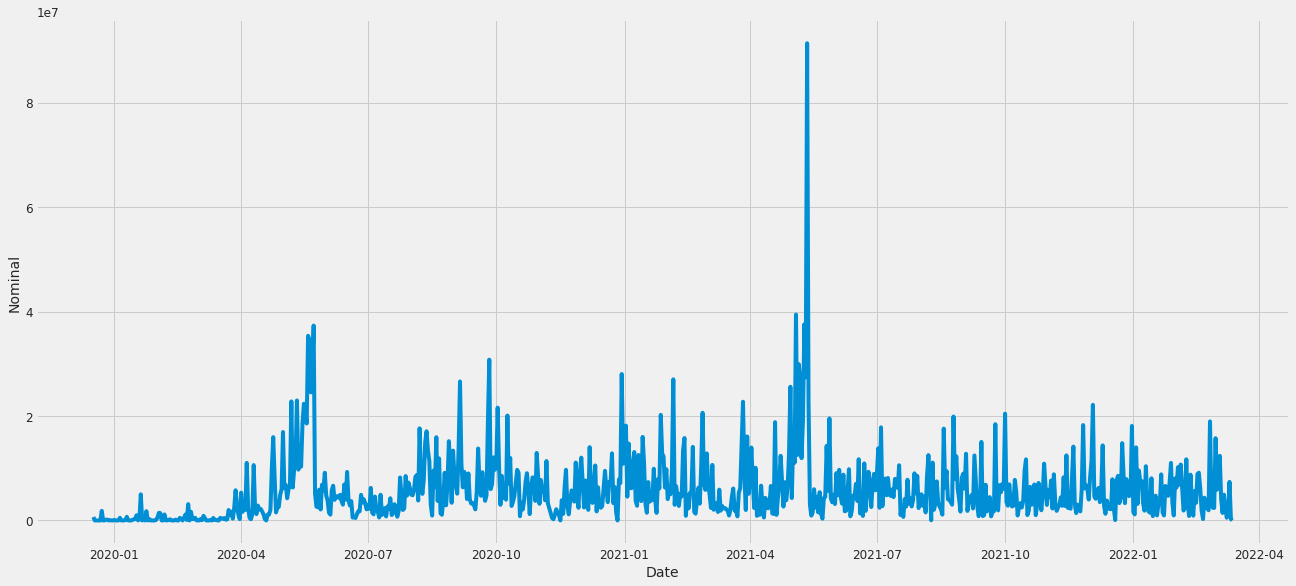

In [ ]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot()
plt.ylabel('Nominal')
plt.xlabel('Date')
# plt.xticks(rotation=45)
plt.plot(sums['Date'],sums['Nominal'], )

In [ ]:
sums.isna().sum()

Nominal    0
dtype: int64

In [ ]:
sums

,Nominal
Date,
2019-12-17,650300.0
2019-12-18,0.0
2019-12-19,0.0
2019-12-20,0.0
2019-12-21,0.0
...,...
2022-03-09,520000.0
2022-03-10,1331062.0
2022-03-11,7382305.0


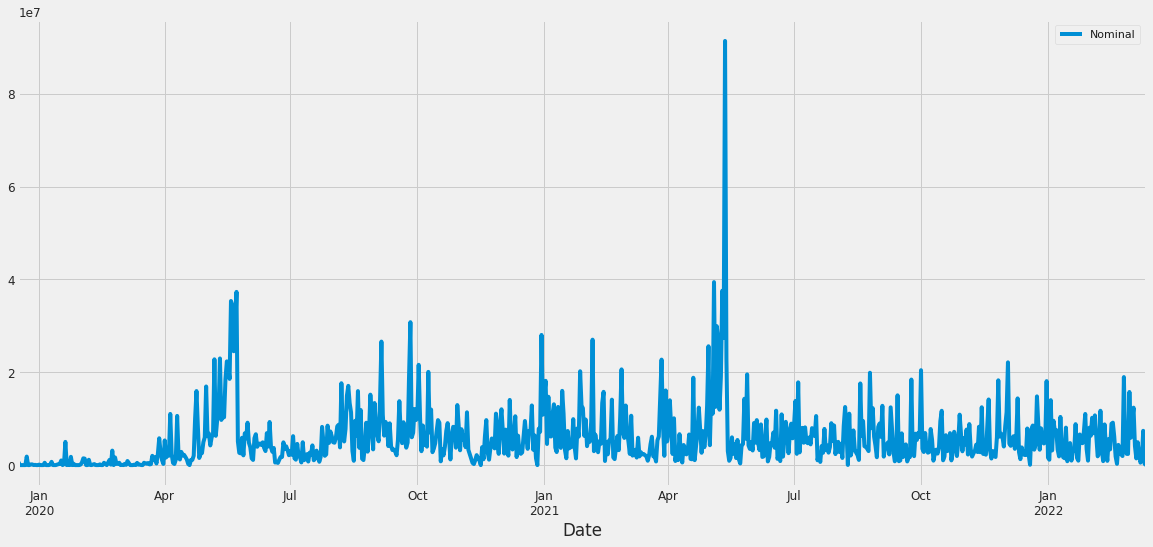

In [ ]:
sums.plot()

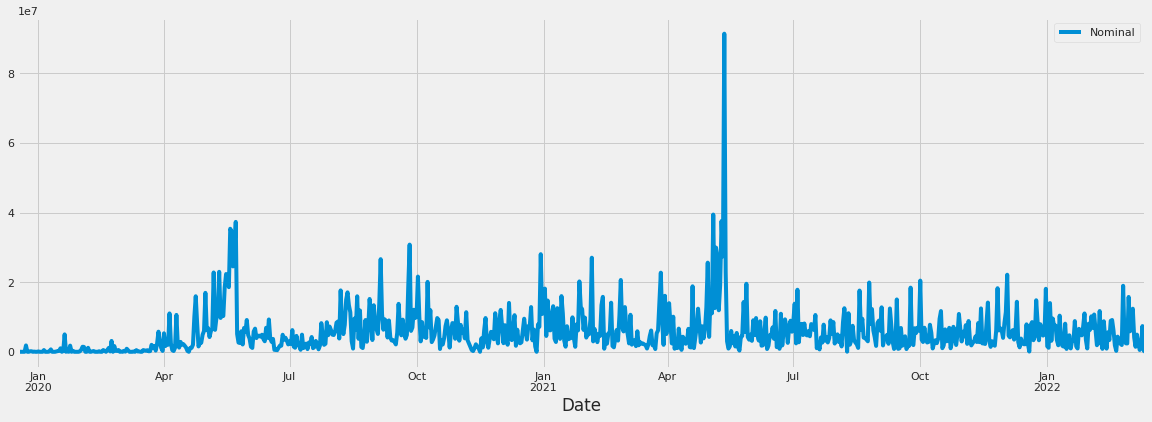

In [ ]:
sums.plot(x='Date',y='Nominal',figsize=(18,6))


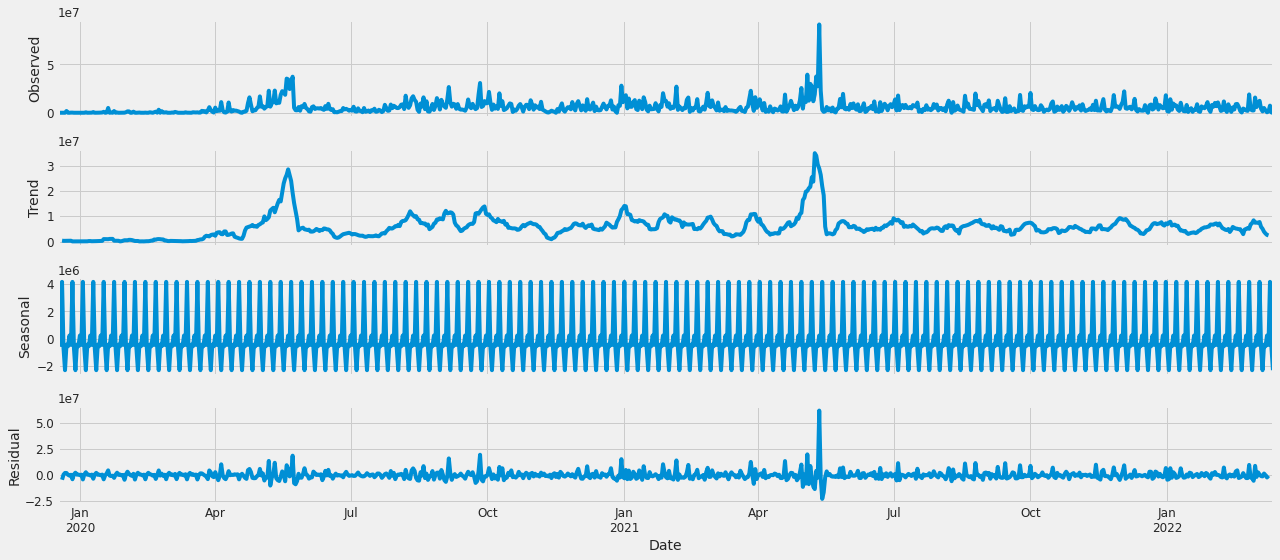

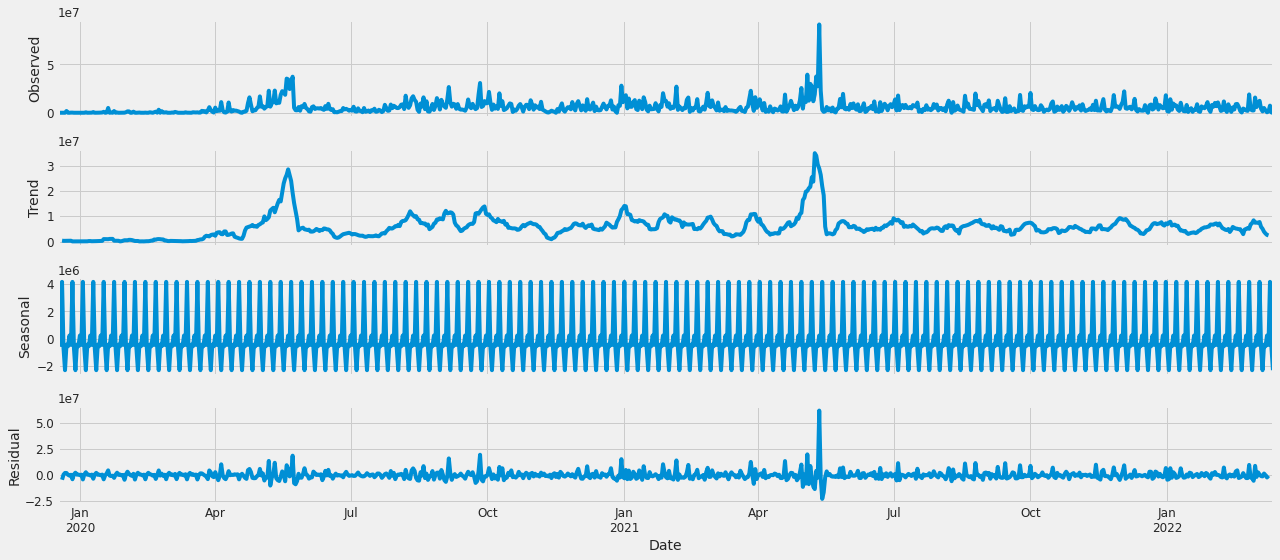

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(sums, model="additive")
decompose_data.plot()